In [169]:
import pybedtools
import matplotlib.pyplot as plt
import matplotlib_venn as vplt

In [170]:
def ven_subplot(title, sets, labels):
    plt.title(title)
    v = vplt.venn2(subsets=sets, set_labels=labels, set_colors=('w', 'w'))
    v.get_label_by_id('10').set_x(0.25)
    v.get_label_by_id('01').set_x(-.25)
    v.get_label_by_id('11').set_x(0)
    v.set_labels[0].set_position((-0.22, -0.45))
    v.set_labels[1].set_position((0.25, -0.45))


    c = vplt.venn2_circles(subsets=(2, 2, 1), linestyle='solid')
    c[0].set_radius(0.32)
    c[1].set_radius(0.32)
    c[0].set_lw(2.0)
    c[1].set_lw(2.0)
    c[0].set_color('green')
    c[1].set_color('red')
    c[0].set_alpha(0.5)
    c[1].set_alpha(0.5)
    c[0].set_edgecolor('black')
    c[1].set_edgecolor('black')

In [190]:
def plot3(new_features_file, catalog_features_file, validated_features_file):
    new_features = pybedtools.BedTool(new_features_file)
    catalog_features = pybedtools.BedTool(catalog_features_file)
    validated_features = pybedtools.BedTool(validated_features_file)

    new_vs_validated = new_features.intersect(validated_features, wo=True)
    catalog_vs_validated = catalog_features.intersect(validated_features, wo=True)
    new_vs_catalog = new_features.intersect(catalog_features, wo=True)

    print("new: " + str(new_features.count()) + " validated: "+ str(validated_features.count()) + " catalog:" + str(catalog_features.count()))

    plt.figure(figsize=(15,10))
    plt.subplot(2, 2, 1)
    
    atotal=validated_features.count()
    btotal=new_features.count()
    ab=new_vs_validated.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('New Features Vs. Validated Features', (a,b,ab), ('New Calls (' + str(btotal) +')', 'Validated ('+ str(atotal) +')'))

    plt.subplot(2, 2, 2)
    
    atotal=validated_features.count()
    btotal=catalog_features.count()
    ab=catalog_vs_validated.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('Catalog Vs. Validated Features', (a,b,ab), ('Catalog (' + str(btotal) +')', 'Validated ('+ str(atotal) +')'))

    plt.subplot(2, 1, 2)
    
    atotal=catalog_features.count()
    btotal=new_features.count()
    ab=new_vs_catalog.count()
    a=atotal-ab
    b=btotal-ab
    ven_subplot('New Features Vs. Catalog', (a,b,ab), ('New Calls (' + str(btotal) +')', 'Catalog ('+ str(atotal) +')'))


In [191]:
minimap2_sniffles_ins = '../../data/DBA2J/bed/minimap2-sniffles/DBA2J_INS.bed'
minimap2_sniffles_del = '../../data/DBA2J/bed/minimap2-sniffles/DBA2J_DEL.bed'

minimap2_pbsv_ins = '../../data/DBA2J/bed/minimap2-pbsv/DBA2J_INS.bed'
minimap2_pbsv_del = '../../data/DBA2J/bed/minimap2-pbsv/DBA2J_DEL.bed'

catalog_ins = '../../data/previous-catalog/DBA2J/catalog/remapped_DBA2J_INS.bed'
catalog_del = '../../data/previous-catalog/DBA2J/catalog/remapped_DBA2J_DEL.bed'

validated_ins = '../../data/DBA2J/validated/remapped_DBA_2J.H6.mm9.bed'
validated_del = '../../data/DBA2J/validated/remapped_DBA_2J.H1.mm9.bed'

# Minimap2 + Sniffles

## Insertions:

new: 39269 validated: 28 catalog:9405


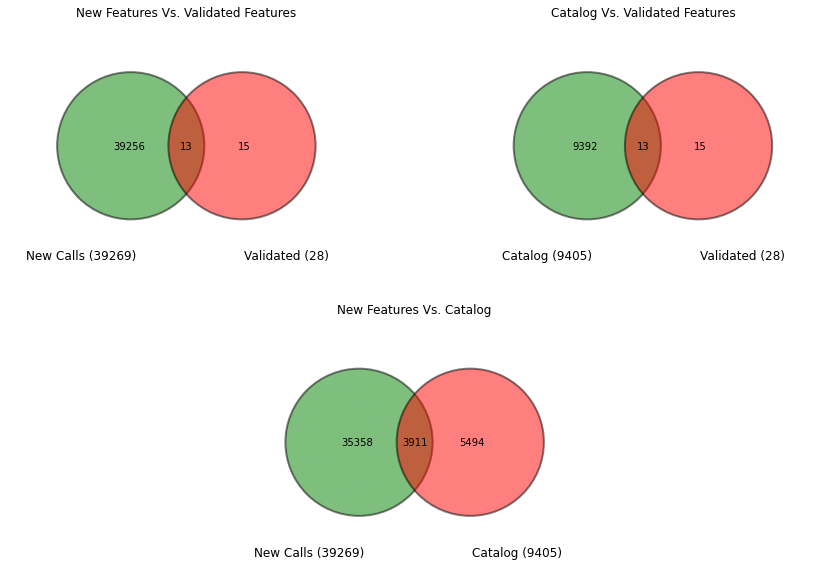

In [192]:
plot3(minimap2_sniffles_ins, catalog_ins, validated_ins)

## Deletions

new: 37375 validated: 81 catalog:17540


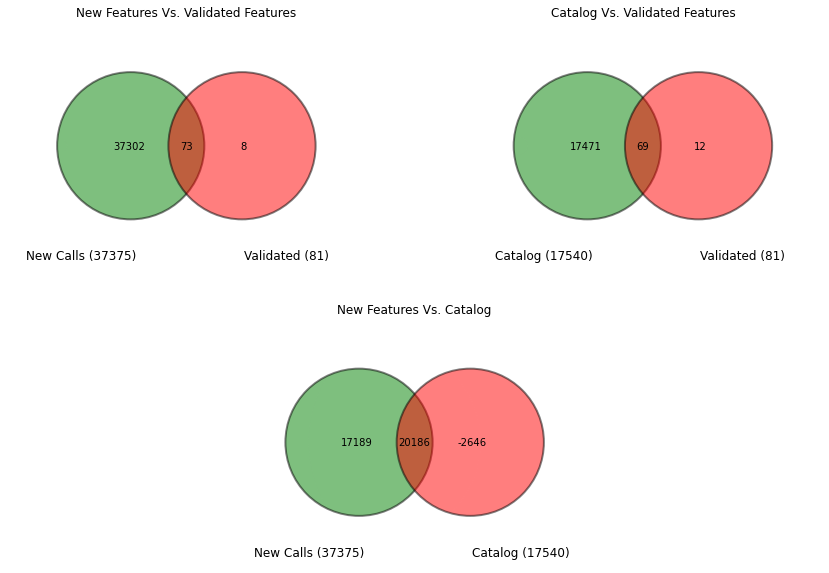

In [193]:
plot3(minimap2_sniffles_del, catalog_del, validated_del)

# Minimap2 + pbsv


## Insertions:

new: 61465 validated: 28 catalog:9405


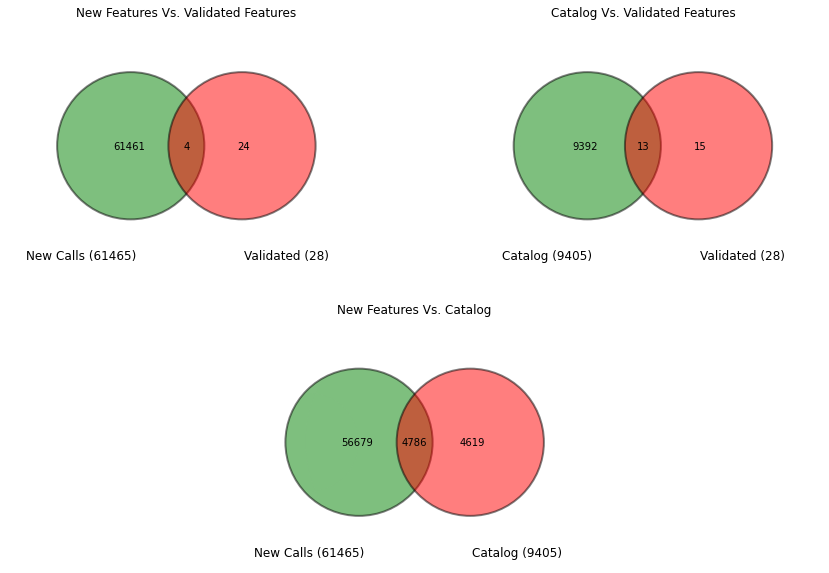

In [194]:
plot3(minimap2_pbsv_ins, catalog_ins, validated_ins)

## Deletions

new: 72688 validated: 81 catalog:17540


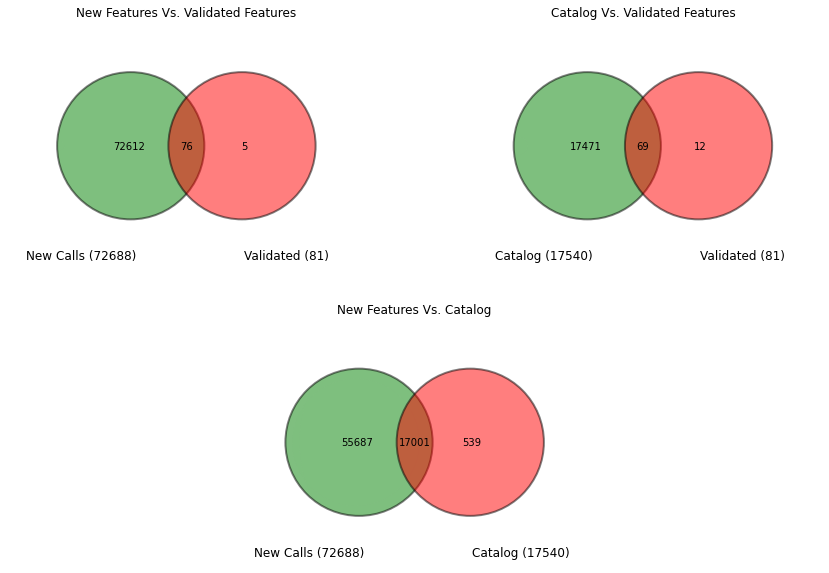

In [195]:
plot3(minimap2_pbsv_del, catalog_del, validated_del)